In [ ]:
## Notebook env: mirtud_env (R kernel)

In [1]:
library(tidyr)
library(dplyr)
library(ggplot2)
library(ggpubr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
## load data
cc_flow = read.csv('/home/ssobti/projects/mir_tud/wetlab_followup_data/cellcycle/041724_cellcycle_flow.csv')
colnames(cc_flow) = c('sample', 'G1_0', 'G1_1', 'G1_2', 'G2_0', 'G2_1', 'G2_2', 'S_0', 'S_1', 'S_2')
cc_flow = cc_flow %>% pivot_longer(cols = -sample, names_to = 'cellcycle', values_to = 'pct_cells') %>% separate_wider_delim(cols = 'cellcycle', delim = '_', names = c('cellcycle', 'replicate')) %>% mutate(replicate = plyr::mapvalues(replicate, from = c('0', '1', '2'), to = c('1', '2', '3')))
head(cc_flow)


sample,cellcycle,replicate,pct_cells
<chr>,<chr>,<chr>,<dbl>
Non-targeting TuD,G1,1,58.8
Non-targeting TuD,G1,2,58.0
Non-targeting TuD,G1,3,57.1
Non-targeting TuD,G2,1,14.5
Non-targeting TuD,G2,2,14.4
Non-targeting TuD,G2,3,13.2


In [3]:
## t-tests
samples = cc_flow %>% pull(sample) %>% unique() %>% sort()
G1_ttests = sapply(samples[-1], FUN = function(x) cc_flow %>% filter(cellcycle == 'G1' & sample %in% c('Non-targeting TuD', x)) %>% t.test(pct_cells ~ sample, .) %>% magrittr::use_series('p.value') %>% signif(6))
G2_ttests = sapply(samples[-1], FUN = function(x) cc_flow %>% filter(cellcycle == 'G2' & sample %in% c('Non-targeting TuD', x)) %>% t.test(pct_cells ~ sample, .) %>% magrittr::use_series('p.value') %>% signif(6))
S_ttests = sapply(samples[-1], FUN = function(x) cc_flow %>% filter(cellcycle == 'S' & sample %in% c('Non-targeting TuD', x)) %>% t.test(pct_cells ~ sample, .) %>% magrittr::use_series('p.value') %>% signif(6))

Warning message in geom_bar(stat = "summary", fun.y = "mean", show.legend = FALSE):
“Ignoring unknown parameters: `fun.y`”


Warning message in geom_bar(stat = "summary", fun.y = "mean", show.legend = FALSE):
“Ignoring unknown parameters: `fun.y`”
Warning message in geom_bar(stat = "summary", fun.y = "mean", show.legend = FALSE):
“Ignoring unknown parameters: `fun.y`”
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


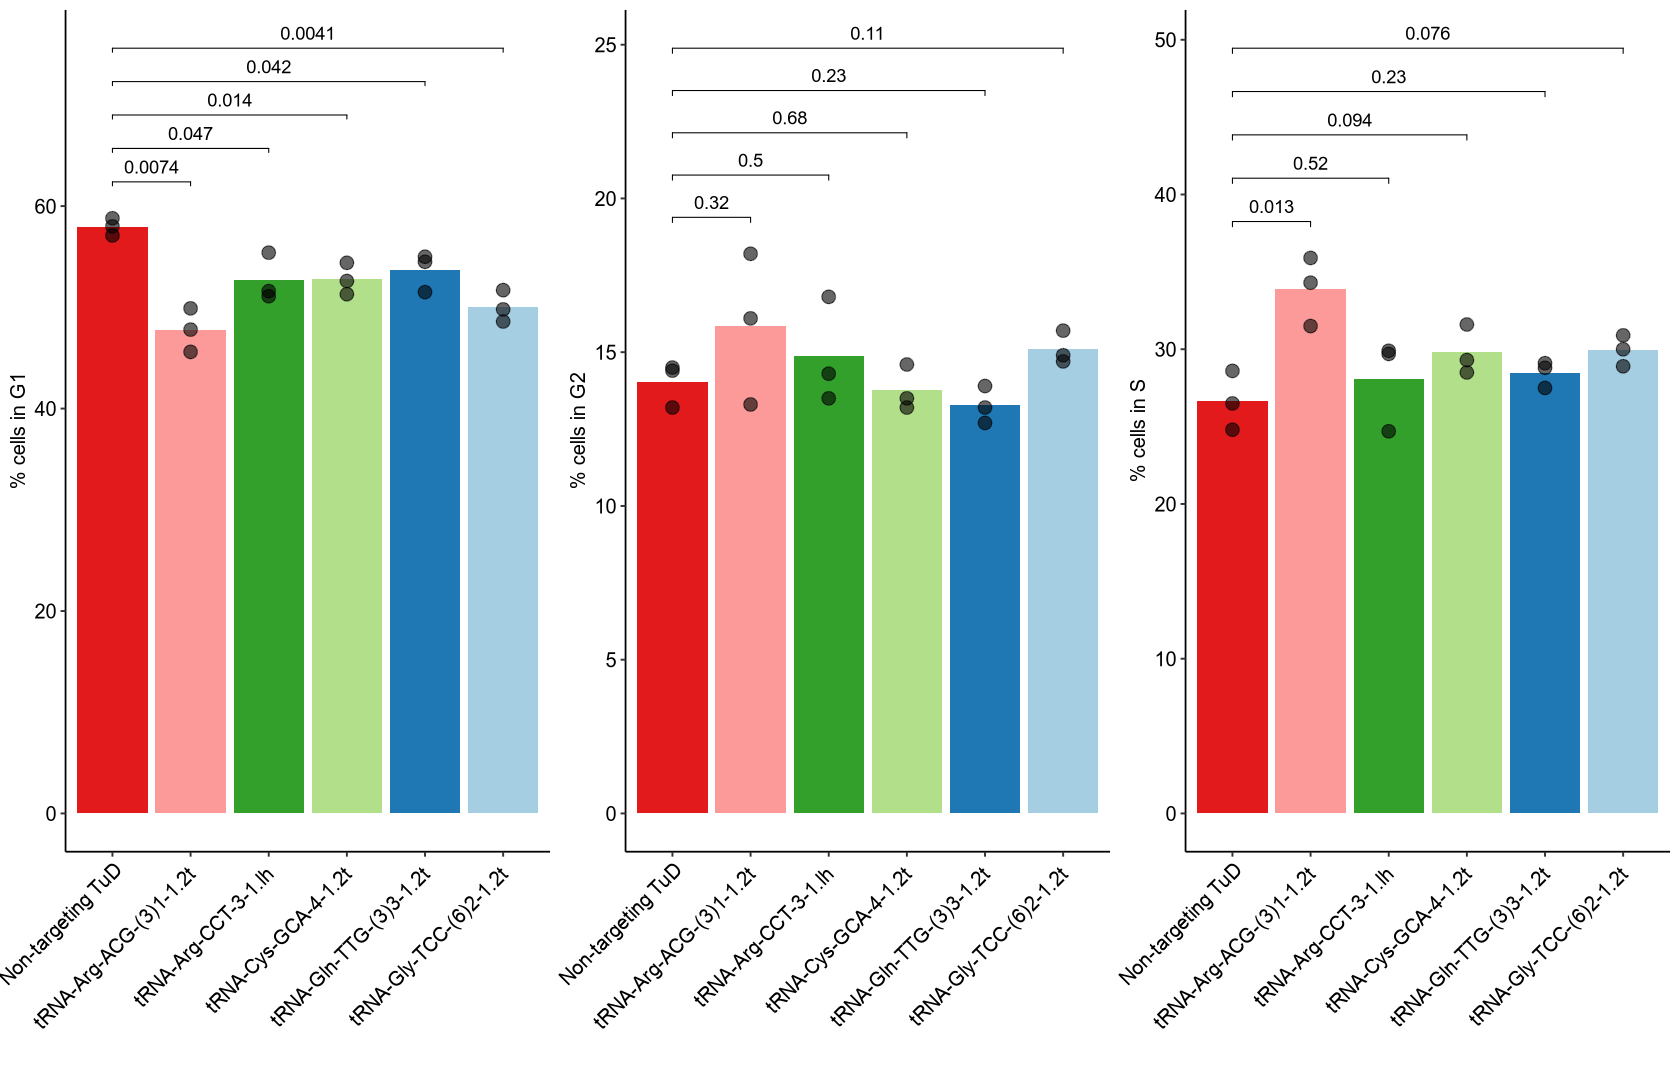

In [106]:
options(repr.plot.width = 14, repr.plot.height = 9)
samples = cc_flow %>% pull(sample) %>% unique() %>% sort()
my_comparisons = list(c(samples[1], samples[2]), c(samples[1], samples[3]), c(samples[1], samples[4]), c(samples[1], samples[5]), c(samples[1], samples[6]))

upper_lim = max(cc_flow %>% filter(cellcycle == 'G1') %>% pull(pct_cells))*1.05
G1_flow = cc_flow %>% filter(cellcycle == 'G1') %>% ggplot(aes(sample, pct_cells, fill = sample)) + geom_bar(stat = 'summary', fun.y = 'mean', show.legend = FALSE) +
geom_point(color = 'black', alpha = 0.6, size = 3.5, show.legend = FALSE) + stat_compare_means(method = "t.test", comparisons = my_comparisons, label.y = upper_lim, step.increase = 0.25) + theme_pubr() + theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1)) + xlab('') + ylab('% cells in G1') + scale_fill_brewer(palette = 'Paired', direction = -1) + scale_color_brewer(palette = 'Paired', direction = -1)

upper_lim = max(cc_flow %>% filter(cellcycle == 'G2') %>% pull(pct_cells))*1.05
G2_flow = cc_flow %>% filter(cellcycle == 'G2') %>% ggplot(aes(sample, pct_cells, fill = sample)) + geom_bar(stat = 'summary', fun.y = 'mean', show.legend = FALSE) +
geom_point(color = 'black', alpha = 0.6, size = 3.5, show.legend = FALSE) + stat_compare_means(method = "t.test", comparisons = my_comparisons, label.y = upper_lim, step.increase = 0.25) + theme_pubr() + theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1)) + xlab('') + ylab('% cells in G2') + scale_fill_brewer(palette = 'Paired', direction = -1) + scale_color_brewer(palette = 'Paired', direction = -1)

upper_lim = max(cc_flow %>% filter(cellcycle == 'S') %>% pull(pct_cells))*1.05
S_flow = cc_flow %>% filter(cellcycle == 'S') %>% ggplot(aes(sample, pct_cells, fill = sample)) + geom_bar(stat = 'summary', fun.y = 'mean', show.legend = FALSE) +
geom_point(color = 'black', alpha = 0.6, size = 3.5, show.legend = FALSE) + stat_compare_means(method = "t.test", comparisons = my_comparisons, label.y = upper_lim, step.increase = 0.25) + theme_pubr() + theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1)) + xlab('') + ylab('% cells in S') + scale_fill_brewer(palette = 'Paired', direction = -1) + scale_color_brewer(palette = 'Paired', direction = -1)

ggarrange(G1_flow, G2_flow, S_flow, ncol = 3, nrow = 1)

In [5]:
saveRDS(cc_flow, '/home/ssobti/projects/mir_tud/fig_output/data/fig3/tRF_cc_flow.rds')

`summarise()` has grouped output by 'sample'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'sample'. You can override using the
`.groups` argument.


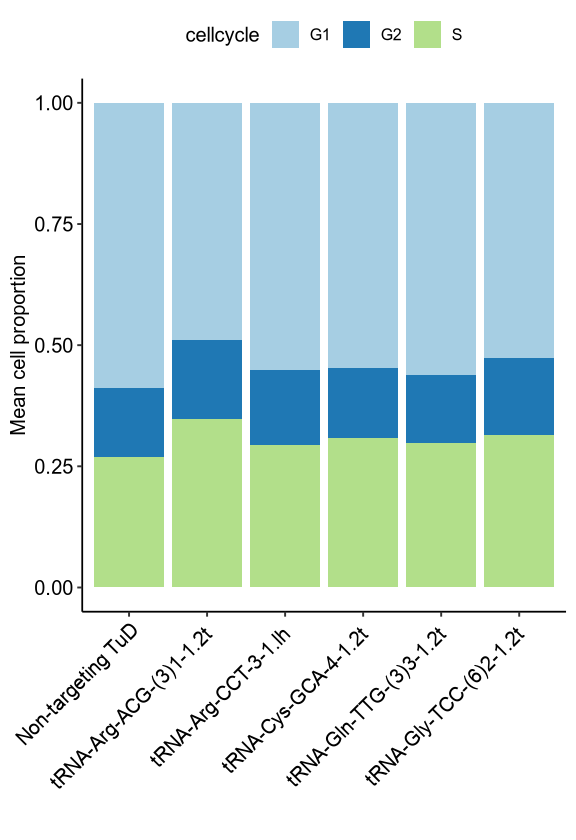

In [5]:
options(repr.plot.width = 4.8, repr.plot.height = 7) 
## stacked barplot of % cells (y-axis) in each cell cycle phase by sample (x axis)
## stacked barplot of relative amount of cells (y-axis) in each cell cycle phase by sample (x axis) -- y-axis is normalized to 100% for each sample

# Stacked
stacked_plot = cc_flow %>% group_by(sample, cellcycle) %>% summarize(mean_pct_cells = mean(pct_cells)) %>% ggplot(aes(fill = cellcycle, y = mean_pct_cells, x = sample)) + 
    geom_bar(position = 'stack', stat = 'identity') + theme_pubr() + theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1)) + xlab('') + scale_fill_brewer(palette = 'Paired') + scale_color_brewer(palette = 'Paired', direction = -1) + ylab('Mean cell %')

# Relative stacked
relative_stacked_plot = cc_flow %>% group_by(sample, cellcycle) %>% summarize(mean_pct_cells = mean(pct_cells)) %>% ggplot(aes(fill = cellcycle, y = mean_pct_cells, x = sample)) + 
    geom_bar(position = 'fill', stat = 'identity') + theme_pubr() + theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1)) + xlab('') + scale_fill_brewer(palette = 'Paired') + scale_color_brewer(palette = 'Paired', direction = -1) + ylab('Mean cell proportion')

#ggarrange(stacked_plot, relative_stacked_plot, ncol = 2, nrow = 1)

relative_stacked_plot

In [53]:
samples = cc_flow %>% group_by(sample, cellcycle) %>% summarize(mean_pct_cells = mean(pct_cells)) %>% pivot_wider(names_from = cellcycle, values_from = mean_pct_cells) %>% as.data.frame() %>% select(sample) %>% pull(sample)
chisq_df = cc_flow %>% group_by(sample, cellcycle) %>% summarize(mean_pct_cells = mean(pct_cells)) %>% pivot_wider(names_from = cellcycle, values_from = mean_pct_cells) %>% as.data.frame() %>% select(-sample) %>% apply(MARGIN = 1, FUN = function(x) x/sum(x)) %>% t() %>% as.data.frame() %>% mutate(sample = samples) %>% pivot_longer(cols = -sample, names_to = 'cellcycle', values_to = 'mean_pct_cells') %>% arrange(factor(cellcycle, levels = c('G1', 'S', 'G2'))) 

`summarise()` has grouped output by 'sample'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'sample'. You can override using the
`.groups` argument.


In [58]:
chisq_df

sample,cellcycle,mean_pct_cells
<chr>,<chr>,<dbl>
Non-targeting TuD,G1,0.5876985
tRNA-Arg-ACG-(3)1-1.2t,G1,0.4897471
tRNA-Arg-CCT-3-1.lh,G1,0.5508711
tRNA-Cys-GCA-4-1.2t,G1,0.5477509
tRNA-Gln-TTG-(3)3-1.2t,G1,0.5625437
tRNA-Gly-TCC-(6)2-1.2t,G1,0.5262973
Non-targeting TuD,S,0.2700237
tRNA-Arg-ACG-(3)1-1.2t,S,0.3475735
tRNA-Arg-CCT-3-1.lh,S,0.2937282


In [55]:
chisq_df %>% filter(sample == tuds[2]) %>% pull(mean_pct_cells)

[1] 0.4897471 0.3475735 0.1626794

In [56]:
chisq_df %>% filter(sample == 'Non-targeting TuD') %>% pull(mean_pct_cells)

[1] 0.5876985 0.2700237 0.1422778

In [79]:
aa %>% filter(sample == tuds[6]) %>% pull(mean_pct_cells)

[1] 50 30 15

In [62]:
aa = cc_flow %>% group_by(sample, cellcycle) %>% summarize(mean_pct_cells = mean(pct_cells)) %>% arrange(factor(cellcycle, levels = c('G1', 'S', 'G2'))) %>% mutate(mean_pct_cells = signif(mean_pct_cells, 2))

`summarise()` has grouped output by 'sample'. You can override using the
`.groups` argument.


In [69]:
tuds

[1] "Non-targeting TuD"       "tRNA-Arg-ACG-(3)1-1.2t "
[3] "tRNA-Arg-CCT-3-1.lh "    "tRNA-Cys-GCA-4-1.2t "   
[5] "tRNA-Gln-TTG-(3)3-1.2t " "tRNA-Gly-TCC-(6)2-1.2t "

In [70]:
chisq_df %>% filter(sample == 'Non-targeting TuD') %>% pull(mean_pct_cells)

[1] 0.5876985 0.2700237 0.1422778

In [104]:
chisq.test(x = aa %>% filter(sample == tuds[2]) %>% pull(mean_pct_cells), p = chisq_df %>% filter(sample == 'Non-targeting TuD') %>% pull(mean_pct_cells), simulate.p.value = TRUE)


	Chi-squared test for given probabilities with simulated p-value (based
	on 2000 replicates)

data:  aa %>% filter(sample == tuds[2]) %>% pull(mean_pct_cells)
X-squared = 4.0488, df = NA, p-value = 0.1249


In [21]:
tuds

[1] "Non-targeting TuD"       "tRNA-Arg-ACG-(3)1-1.2t "
[3] "tRNA-Arg-CCT-3-1.lh "    "tRNA-Cys-GCA-4-1.2t "   
[5] "tRNA-Gln-TTG-(3)3-1.2t " "tRNA-Gly-TCC-(6)2-1.2t "

In [23]:
chisq_df %>% filter(sample == tuds[2]) %>% pull(mean_pct_cells)

[1] 48 34 16